# Impor packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\USER\\Project_Python\\MySkill\\User Segmentation_Online Retail Data'

# Memuat Dataset

In [5]:
df = pd.read_csv('Online Retail Data.csv', header=0)
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


## Assessing Data

**Memeriksa tipe data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


### Insight :
- **Missing Values**: Ada nilai yang hilang dalam kolom `product_name` dan `customer_id`. Ini perlu ditangani dalam langkah pembersihan data.
- **Tipe Data**: Kolom `order_date` sebaiknya dikonversi ke tipe datetime untuk analisis lebih lanjut yang melibatkan tanggal.
- **Jumlah Data**: Dengan lebih dari 460 ribu entri, data ini cukup besar dan mungkin memerlukan teknik khusus untuk pemrosesan efisien.

**Menghitung jumlah nilai unik di setiap kolom**

In [7]:
df.nunique()

order_id        25301
product_code     4508
product_name     4491
quantity          737
order_date      22368
price            1448
customer_id      3940
dtype: int64

**Memeriksa duplikasi data**

In [8]:
# Menghitung & Menampilkan jumlah baris dengan duplikasi values
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  6479


In [9]:
from fast_ml.feature_selection import get_duplicate_features

# Mendapatkan kolom-kolom dengan duplikasi values
duplicate_features = get_duplicate_features(df)
print('Duplikasi kolom:\n')
print(duplicate_features)

Duplikasi kolom:

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []


**Memeriksa missing values**

In [10]:
print(df.isnull().sum())

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64


**Memeriksa parameter statistik dari kolom numerik**

In [11]:
df.describe()

,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


### Insight :
- **Outliers dan Data Kotor**: Terdapat nilai negatif dalam kolom `quantity` dan `price` yang mungkin perlu ditinjau dan diperbaiki atau dihapus.
- **Distribusi Data**: Terdapat variasi yang besar dalam data, baik dalam jumlah barang yang dipesan maupun harga barang.
- **Missing Values**: Sejumlah besar baris tidak memiliki `customer_id`, yang dapat mempengaruhi analisis.

Analisis lebih lanjut dapat dilakukan untuk **menangani outliers, missing values, dan mengidentifikasi pola-pola penting dalam data.**

# Data Cleansing

**Menangani missing value**

In [12]:
df[df.customer_id.isna()].head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
5,493413,21723,ALPHABET HEARTS STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
477,493485,72008,FROSTED BOX 9 WHITE T-LIGHT CANDLES,24,2010-01-04 14:48:00,0.42,NaN
478,493485,21589,SWALLOW GIANT TUBE MATCHES,2,2010-01-04 14:48:00,2.55,NaN


In [13]:
# menghapus semua baris tanpa customer_id
df = df[~df['customer_id'].isna()]

In [14]:
df[df.product_name.isna()].head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id


In [15]:
print(df.isnull().sum())

order_id        0
product_code    0
product_name    0
quantity        0
order_date      0
price           0
customer_id     0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360853 entries, 0 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      360853 non-null  object 
 1   product_code  360853 non-null  object 
 2   product_name  360853 non-null  object 
 3   quantity      360853 non-null  int64  
 4   order_date    360853 non-null  object 
 5   price         360853 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 22.0+ MB


**Menangani value pada kolom product_code dan product_name yang mengandung kata "test"**

In [17]:
# Memfilter baris yang product_code atau product_name mengandung kata 'test'
df_filtered = df[(df['product_code'].str.contains('test', case=False, na=False)) | (df['product_name'].str.contains('test', case=False, na=False))]

# Menghitung jumlah baris
jumlah_baris = len(df_filtered)

# Menampilkan jumlah baris
print("Jumlah baris yang yang product_code atau product_name mengandung kata 'test' :", jumlah_baris)

# Menampilkan hasil
df_filtered

Jumlah baris yang yang product_code atau product_name mengandung kata 'test' : 11


,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0
10146,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0
19402,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0
40332,497819,TEST001,This is a test product.,5,2010-02-12 14:58:00,0.0,14103.0
40427,497843,TEST001,This is a test product.,5,2010-02-12 15:47:00,0.0,14827.0
102946,504188,TEST001,This is a test product.,5,2010-04-12 09:52:00,4.5,16454.0
300544,C525272,TEST001,This is a test product.,-1,2010-10-04 16:29:00,4.5,16454.0
300545,C525273,TEST001,This is a test product.,-1,2010-10-04 16:30:00,4.5,16454.0
300546,C525274,TEST001,This is a test product.,-1,2010-10-04 16:33:00,4.5,12346.0


In [18]:
# menghapus semua baris dengan product_code atau product_name test
df = df[(~df['product_code'].str.lower().str.contains('test')) |
        (~df['product_name'].str.contains('test '))]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360842 entries, 1 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      360842 non-null  object 
 1   product_code  360842 non-null  object 
 2   product_name  360842 non-null  object 
 3   quantity      360842 non-null  int64  
 4   order_date    360842 non-null  object 
 5   price         360842 non-null  float64
 6   customer_id   360842 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 22.0+ MB


**Menangani duplikasi data**

In [21]:
print("Jumlah duplikasi: ", df.duplicated().sum())

# Mengidentifikasi baris yang memiliki duplikasi berdasarkan semua kolom
duplikat = df[df.duplicated(keep=False)]

# Menampilkan baris yang memiliki duplikasi
print("Baris yang memiliki duplikasi:")
duplikat

Jumlah duplikasi:  6411
Baris yang memiliki duplikasi:


,order_id,product_code,product_name,quantity,order_date,price,customer_id
160,493435,21678,PAISLEY PATTERN STICKERS,2,2010-01-04 12:57:00,0.85,13206.0
173,493435,21678,PAISLEY PATTERN STICKERS,2,2010-01-04 12:57:00,0.85,13206.0
254,493442,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-01-04 13:36:00,2.10,13821.0
255,493442,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-01-04 13:36:00,2.10,13821.0
264,493442,20712,JUMBO BAG WOODLAND ANIMALS,1,2010-01-04 13:36:00,1.95,13821.0
...,...,...,...,...,...,...,...
459129,539653,22834,HAND WARMER BABUSHKA DESIGN,24,2010-12-20 16:50:00,0.85,13564.0
459227,539659,22728,ALARM CLOCK BAKELIKE PINK,6,2010-12-21 09:47:00,3.75,15034.0
459228,539659,22728,ALARM CLOCK BAKELIKE PINK,6,2010-12-21 09:47:00,3.75,15034.0
461725,539988,20751,FUNKY WASHING UP GLOVES ASSORTED,2,2010-12-23 16:06:00,2.10,18116.0


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354431 entries, 1 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      354431 non-null  object 
 1   product_code  354431 non-null  object 
 2   product_name  354431 non-null  object 
 3   quantity      354431 non-null  int64  
 4   order_date    354431 non-null  object 
 5   price         354431 non-null  float64
 6   customer_id   354431 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 21.6+ MB


**Menangani Inaccurate value**

In [24]:
# mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled
df['quantity'] = df['quantity'].abs()

In [25]:
# membuat semua product_name berhuruf kecil
df['product_name'] = df['product_name'].str.lower()

In [26]:
# Memfilter baris dengan price bernilai negatif
df_negatif_price = df[df['price'] < 0]

# Menghitung jumlah baris dengan price bernilai negatif
jumlah_baris_negatif = len(df_negatif_price)

# Menampilkan jumlah baris
print("Jumlah baris dengan price bernilai negatif:", jumlah_baris_negatif)

# Menampilkan beberapa baris pertama dengan price bernilai negatif
print(df_negatif_price.head())

Jumlah baris dengan price bernilai negatif: 0
Empty DataFrame
Columns: [order_id, product_code, product_name, quantity, order_date, price, customer_id]
Index: []


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354431 entries, 1 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      354431 non-null  object 
 1   product_code  354431 non-null  object 
 2   product_name  354431 non-null  object 
 3   quantity      354431 non-null  int64  
 4   order_date    354431 non-null  object 
 5   price         354431 non-null  float64
 6   customer_id   354431 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 21.6+ MB


**Membuat kolom baru**

In [28]:
# membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'
df['order_status'] = np.where(df['order_id'].str[:1]=='C', 'cancelled', 'delivered')

In [29]:
# membuat kolom amount, yaitu perkalian antara quantity dan price
df['amount'] = df['quantity'] * df['price']

In [30]:
# membuat kolom date
df['date'] = pd.to_datetime(df['order_date']).dt.date.astype('datetime64[ns]')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354431 entries, 1 to 461744
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      354431 non-null  object        
 1   product_code  354431 non-null  object        
 2   product_name  354431 non-null  object        
 3   quantity      354431 non-null  int64         
 4   order_date    354431 non-null  object        
 5   price         354431 non-null  float64       
 6   customer_id   354431 non-null  float64       
 7   order_status  354431 non-null  object        
 8   amount        354431 non-null  float64       
 9   date          354431 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 29.7+ MB


**Mengganti product_name dari product_code yang memiliki beberapa product_name dengan salah satu product_name-nya yang paling sering muncul**

Langkah ini perlu dilakukan dalam user segmentation karena beberapa alasan berikut:

### Konsistensi dan Keakuratan Data:
1. **Mengatasi Ambiguitas**:
   - Kode produk (`product_code`) yang sama mungkin memiliki beberapa nama produk (`product_name`) yang berbeda di dalam dataset. Ini bisa terjadi karena kesalahan input data, variasi penamaan, atau pembaruan produk. Menggunakan satu nama produk yang paling sering muncul untuk setiap kode produk membantu mengatasi ambiguitas ini dan memastikan konsistensi data.

2. **Mengeliminasi Kebingungan**:
   - Dengan memilih nama produk yang paling sering muncul, kita mengeliminasi kebingungan yang mungkin timbul akibat adanya beberapa nama produk untuk satu kode produk yang sama. Hal ini membuat analisis data menjadi lebih sederhana dan dapat diandalkan.

### Mempermudah Analisis dan Visualisasi:
1. **Ringkas dan Jelas**:
   - Dataset yang lebih ringkas dengan nama produk yang seragam untuk setiap kode produk akan mempermudah analisis lebih lanjut dan visualisasi data. Ini membantu dalam memahami tren dan pola dengan lebih cepat dan jelas.

2. **Efektivitas Penjualan**:
   - Mengetahui produk mana yang paling sering dipesan di antara berbagai nama produk yang ada membantu dalam menilai efektivitas dan popularitas produk. Hal ini merupakan bagian penting dari analisis segmentasi pengguna, yang bertujuan untuk memahami perilaku pengguna dan preferensi mereka.

### Peningkatan Model Prediksi:
1. **Model Prediktif yang Lebih Baik**:
   - Dengan data yang lebih konsisten, model prediksi dapat dilatih dengan lebih baik dan memberikan hasil yang lebih akurat. Variasi dalam penamaan produk dapat menjadi gangguan dalam proses pelatihan model machine learning, sehingga dengan mengurangi variasi ini, kita mendapatkan model yang lebih kuat.

2. **Analisis Tren yang Akurat**:
   - Menggunakan nama produk yang konsisten untuk setiap kode produk membantu dalam melakukan analisis tren yang lebih akurat. Anda dapat mengidentifikasi tren popularitas produk dari waktu ke waktu dengan lebih tepat.

In [32]:
# mengelompokkan DataFrame df berdasarkan kombinasi product_code dan product_name, 
# kemudian menghitung jumlah unik order_id untuk setiap kombinasi, 
# dan akhirnya mengurutkan hasil berdasarkan product_code dan jumlah pesanan (order_cnt).
most_freq_product_name = df.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name

,product_code,product_name,order_cnt
0,10002,inflatable political globe,204
1,10080,groovy cactus inflatable,3
2,10120,doggy rubber,31
3,10123C,hearts wrapping tape,32
4,10123G,army camo wrapping tape,11
...,...,...,...
4304,D,discount,78
4305,M,manual,482
4306,PADS,pads to match all cushions,14
4307,POST,postage,57


In [33]:
# mengelompokkan DataFrame most_freq_product_name berdasarkan product_code dan memilih kolom order_cnt untuk perhitungan selanjutnya.
# memberi peringkat pada nilai dalam kolom order_cnt untuk setiap kelompok product_code.
# Hasil dari perhitungan peringkat disimpan dalam kolom baru bernama rank di DataFrame most_freq_product_name.
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name

,product_code,product_name,order_cnt,rank
0,10002,inflatable political globe,204,1.0
1,10080,groovy cactus inflatable,3,1.0
2,10120,doggy rubber,31,1.0
3,10123C,hearts wrapping tape,32,1.0
4,10123G,army camo wrapping tape,11,1.0
...,...,...,...,...
4304,D,discount,78,1.0
4305,M,manual,482,1.0
4306,PADS,pads to match all cushions,14,1.0
4307,POST,postage,57,1.0


Tujuan keseluruhan dari langkah ini adalah untuk mengidentifikasi produk mana yang paling sering dipesan (memiliki `order_cnt` tertinggi) untuk setiap `product_code`. Dengan informasi peringkat ini, kita dapat:
- Memilih produk dengan jumlah pesanan terbanyak untuk setiap `product_code`.
- Menentukan produk mana yang paling populer atau paling laris dalam setiap kategori kode produk.

In [34]:
# memfilter DataFrame most_freq_product_name sehingga hanya menyertakan baris di mana nilai rank adalah 1
# kemudian menghapus kolom order_cnt dan rank dari DataFrame. 
# Kolom-kolom ini tidak lagi diperlukan setelah kita mendapatkan produk dengan nama yang paling sering muncul untuk setiap kode produk.
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
most_freq_product_name

,product_code,product_name
0,10002,inflatable political globe
1,10080,groovy cactus inflatable
2,10120,doggy rubber
3,10123C,hearts wrapping tape
4,10123G,army camo wrapping tape
...,...,...
4304,D,discount
4305,M,manual
4306,PADS,pads to match all cushions
4307,POST,postage


In [35]:
# menggabungkan DataFrame asli df dengan DataFrame most_freq_product_name berdasarkan kolom product_code
# yang menunjukkan nama produk yang paling sering dipesan untuk setiap product_code
# Hal ini membantu dalam menyamakan nama produk untuk kode produk yang mungkin memiliki beberapa nama produk.
df = df.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,date,most_freq_product_name
0,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25,2010-01-04,red retrospot butter dish
1,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80,2010-01-04,red retrospot mug
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,delivered,51.00,2010-01-04,retro spot large milk jug
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,delivered,5.10,2010-01-04,new england ceramic cake server
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,delivered,8.50,2010-01-04,hand open shape gold
...,...,...,...,...,...,...,...,...,...,...,...
354426,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,delivered,1.25,2010-12-23,set of 3 butterfly cookie cutters
354427,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,delivered,1.69,2010-12-23,hot baths soap holder
354428,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,delivered,1.69,2010-12-23,fairy soap soap holder
354429,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,delivered,9.90,2010-12-23,cream sweetheart egg holder


In [36]:
# mengganti nilai dalam kolom product_name dengan nilai dalam kolom most_freq_product_name 
# dan kemudian menghapus kolom most_freq_product_name dari DataFrame df
df['product_name'] = df['most_freq_product_name']
df = df.drop(columns='most_freq_product_name')
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,date
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25,2010-01-04
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80,2010-01-04
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,delivered,51.00,2010-01-04
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,delivered,5.10,2010-01-04
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,delivered,8.50,2010-01-04
...,...,...,...,...,...,...,...,...,...,...
354426,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,delivered,1.25,2010-12-23
354427,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,delivered,1.69,2010-12-23
354428,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,delivered,1.69,2010-12-23
354429,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,delivered,9.90,2010-12-23


Hasilnya adalah DataFrame `df` di mana kolom `product_name` berisi nama produk yang paling sering dipesan untuk setiap `product_code`, dan kolom `most_freq_product_name` telah dihapus untuk menjaga kebersihan dan keterbacaan data.

Langkah ini membantu dalam konsolidasi dan penyederhanaan data produk untuk analisis retensi pengguna. 

In [37]:
# mengkonversi customer_id menjadi string
df['customer_id'] = df['customer_id'].astype(str)

Perintah ini digunakan untuk mengubah tipe data kolom `customer_id` menjadi string. 

### Mengapa Ini Penting?
- **Konsistensi Data**: Mengubah `customer_id` menjadi string memastikan bahwa semua nilai dalam kolom tersebut diperlakukan sebagai teks. Ini berguna jika  ingin menghindari perhitungan matematis atau operasi numerik yang tidak disengaja.
- **Pemrosesan Data**: Banyak operasi pemrosesan data lebih mudah dilakukan dengan string, terutama jika `customer_id` berisi karakter non-numerik atau panjang yang bervariasi.
- **Pengenalan Unik**: ID pelanggan biasanya bersifat unik dan lebih tepat jika diperlakukan sebagai string, sehingga tidak ada penafsiran yang salah sebagai nilai numerik.

Langkah ini adalah bagian dari proses pembersihan data, memastikan bahwa semua data dalam kolom `customer_id` sesuai dengan tipe yang diharapkan untuk analisis lebih lanjut.

In [38]:
# menghapus outlier
from scipy import stats
df = df[(np.abs(stats.zscore(df[['quantity','amount']]))<3).all(axis=1)]
df = df.reset_index(drop=True)
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,date
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25,2010-01-04
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80,2010-01-04
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,delivered,51.00,2010-01-04
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,delivered,5.10,2010-01-04
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,delivered,8.50,2010-01-04
...,...,...,...,...,...,...,...,...,...,...
352074,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,delivered,1.25,2010-12-23
352075,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,delivered,1.69,2010-12-23
352076,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,delivered,1.69,2010-12-23
352077,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,delivered,9.90,2010-12-23


Jika langkah menghapus outlier ini tidak dilakukan dalam analisis user segmentation, beberapa masalah dapat muncul:

1. **Distorsi Hasil Analisis**: Outlier dapat sangat mempengaruhi perhitungan statistik seperti mean, median, dan standar deviasi. Ini dapat menyebabkan hasil analisis yang tidak akurat atau menyesatkan.

2. **Kesalahan Model Prediksi**: Dalam konteks machine learning, model yang dilatih dengan data yang mengandung outlier mungkin belajar pola yang tidak representatif dari populasi data yang sebenarnya. Ini dapat mengurangi akurasi model prediksi dan membuatnya kurang dapat diandalkan.

3. **Kesimpulan yang Salah**: Analisis yang mengandalkan data yang mengandung outlier mungkin menghasilkan kesimpulan yang salah. Misalnya, kita mungkin mengidentifikasi tren atau pola yang sebenarnya tidak ada karena adanya nilai-nilai ekstrem tersebut.

4. **Keputusan Bisnis yang Buruk**: Hasil analisis yang terdistorsi dapat menyebabkan pengambilan keputusan bisnis yang buruk. Sebagai contoh, kita mungkin mengalokasikan sumber daya atau merumuskan strategi pemasaran berdasarkan data yang tidak akurat.

5. **Mengabaikan Data Penting**: Dalam beberapa kasus, outlier sebenarnya dapat menunjukkan kejadian penting atau pola yang perlu diteliti lebih lanjut. Namun, jika tidak disaring dan dianalisis dengan tepat, informasi ini mungkin akan terlewatkan atau diabaikan.

Dengan demikian, menghapus outlier adalah langkah penting dalam memastikan kualitas dan keandalan analisis retensi pengguna. Ini membantu untuk mendapatkan gambaran yang lebih akurat tentang perilaku dan tren pelanggan, yang pada akhirnya akan mendukung pengambilan keputusan yang lebih baik.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352079 entries, 0 to 352078
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      352079 non-null  object        
 1   product_code  352079 non-null  object        
 2   product_name  352079 non-null  object        
 3   quantity      352079 non-null  int64         
 4   order_date    352079 non-null  object        
 5   price         352079 non-null  float64       
 6   customer_id   352079 non-null  object        
 7   order_status  352079 non-null  object        
 8   amount        352079 non-null  float64       
 9   date          352079 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 26.9+ MB


# Membuat RFM segmentation

## Agregat data transaksi ke bentuk summary total transaksi (order), total nilai order (order value), tanggal order terakhir dari setiap pengguna.

In [40]:
df_user = df.groupby('customer_id', as_index=False).agg(order_cnt=('order_id','nunique'),max_order_date=('date','max'),total_order_value=('amount','sum'))
df_user

,customer_id,order_cnt,max_order_date,total_order_value
0,12346.0,5,2010-10-04,589.46
1,12608.0,1,2010-10-31,415.79
2,12745.0,2,2010-08-10,723.85
3,12746.0,2,2010-06-30,266.35
4,12747.0,19,2010-12-13,4075.29
...,...,...,...,...
3884,18283.0,6,2010-11-22,619.37
3885,18284.0,2,2010-10-06,486.68
3886,18285.0,1,2010-02-17,427.00
3887,18286.0,2,2010-08-20,941.48


## Buat kolom jumlah hari sejak order terakhir

In [42]:
# Mendefinisikan tanggal saat ini
today = dt.datetime.today()

# Menampilkan hasil
print("Tanggal saat ini adalah:", today)

Tanggal saat ini adalah: 2025-02-11 11:27:24.686535


In [43]:
today = df['date'].max()
df_user['day_since_last_order'] = (today - df_user['max_order_date']).dt.days
df_user

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order
0,12346.0,5,2010-10-04,589.46,80
1,12608.0,1,2010-10-31,415.79,53
2,12745.0,2,2010-08-10,723.85,135
3,12746.0,2,2010-06-30,266.35,176
4,12747.0,19,2010-12-13,4075.29,10
...,...,...,...,...,...
3884,18283.0,6,2010-11-22,619.37,31
3885,18284.0,2,2010-10-06,486.68,78
3886,18285.0,1,2010-02-17,427.00,309
3887,18286.0,2,2010-08-20,941.48,125


In [44]:
df_user.describe()

,order_cnt,max_order_date,total_order_value,day_since_last_order
count,3889.000000,3889,3889.000000,3889.000000
mean,5.128825,2010-09-23 04:46:57.793777664,1537.084442,90.800720
min,1.000000,2010-01-05 00:00:00,1.250000,0.000000
25%,1.000000,2010-08-19 00:00:00,294.170000,25.000000
50%,3.000000,2010-10-26 00:00:00,645.600000,58.000000
75%,6.000000,2010-11-28 00:00:00,1581.210000,126.000000
max,163.000000,2010-12-23 00:00:00,71970.390000,352.000000
std,8.499946,NaN,3430.541703,88.873286


## Buat binning untuk RFM (Recency, Frequency, Monetary)

**1. Buat binning dari jumlah hari sejak order terakhir yang terdiri dari 5 bins dengan batas-batasnya merupakan min, P20, P40, P60, P80, max dan beri label 1 sampai 5 dari bin tertinggi ke terendah sebagai skor recency**

In [45]:
df_user['recency_score'] = pd.cut(df_user['day_since_last_order'],
                                  bins=[df_user['day_since_last_order'].min(),
                                        np.percentile(df_user['day_since_last_order'], 20),
                                        np.percentile(df_user['day_since_last_order'], 40),
                                        np.percentile(df_user['day_since_last_order'], 60),
                                        np.percentile(df_user['day_since_last_order'], 80),
                                        df_user['day_since_last_order'].max()],
                                  labels=[5, 4, 3, 2, 1],
                                  include_lowest=True).astype(int)
df_user

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score
0,12346.0,5,2010-10-04,589.46,80,2
1,12608.0,1,2010-10-31,415.79,53,3
2,12745.0,2,2010-08-10,723.85,135,2
3,12746.0,2,2010-06-30,266.35,176,1
4,12747.0,19,2010-12-13,4075.29,10,5
...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22,619.37,31,4
3885,18284.0,2,2010-10-06,486.68,78,2
3886,18285.0,1,2010-02-17,427.00,309,1
3887,18286.0,2,2010-08-20,941.48,125,2


In [46]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           3889 non-null   object        
 1   order_cnt             3889 non-null   int64         
 2   max_order_date        3889 non-null   datetime64[ns]
 3   total_order_value     3889 non-null   float64       
 4   day_since_last_order  3889 non-null   int64         
 5   recency_score         3889 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 167.2+ KB


**2. Buat binning dari total transaksi (order) yang terdiri dari 5 bins dengan batas-batasnya merupakan min, P20, P40, P60, P80, max dan beri label 1 sampai 5 dari bin terendah ke tertinggi sebagai skor frequency**

In [47]:
df_user['frequency_score'] = pd.cut(df_user['order_cnt'],
                                    bins=[0,
                                          np.percentile(df_user['order_cnt'], 20),
                                          np.percentile(df_user['order_cnt'], 40),
                                          np.percentile(df_user['order_cnt'], 60),
                                          np.percentile(df_user['order_cnt'], 80),
                                          df_user['order_cnt'].max()],
                                    labels=[1, 2, 3, 4, 5],
                                    include_lowest=True).astype(int)
df_user

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score
0,12346.0,5,2010-10-04,589.46,80,2,4
1,12608.0,1,2010-10-31,415.79,53,3,1
2,12745.0,2,2010-08-10,723.85,135,2,2
3,12746.0,2,2010-06-30,266.35,176,1,2
4,12747.0,19,2010-12-13,4075.29,10,5,5
...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22,619.37,31,4,4
3885,18284.0,2,2010-10-06,486.68,78,2,2
3886,18285.0,1,2010-02-17,427.00,309,1,1
3887,18286.0,2,2010-08-20,941.48,125,2,2


In [48]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           3889 non-null   object        
 1   order_cnt             3889 non-null   int64         
 2   max_order_date        3889 non-null   datetime64[ns]
 3   total_order_value     3889 non-null   float64       
 4   day_since_last_order  3889 non-null   int64         
 5   recency_score         3889 non-null   int32         
 6   frequency_score       3889 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(1)
memory usage: 182.4+ KB


**3. Buat binning dari total nilai order (order value) yang terdiri dari 5 bins dengan batas-batasnya merupakan min, P20, P40, P60, P80, max dan beri label 1 sampai 5 dari bin terendah ke tertinggi sebagai skor monetary**

In [49]:
df_user['monetary_score'] = pd.cut(df_user['total_order_value'],
                                   bins=[df_user['total_order_value'].min(),
                                         np.percentile(df_user['total_order_value'], 20),
                                         np.percentile(df_user['total_order_value'], 40),
                                         np.percentile(df_user['total_order_value'], 60),
                                         np.percentile(df_user['total_order_value'], 80),
                                         df_user['total_order_value'].max()],
                                   labels=[1, 2, 3, 4, 5],
                                   include_lowest=True).astype(int)
df_user

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score
0,12346.0,5,2010-10-04,589.46,80,2,4,3
1,12608.0,1,2010-10-31,415.79,53,3,1,2
2,12745.0,2,2010-08-10,723.85,135,2,2,3
3,12746.0,2,2010-06-30,266.35,176,1,2,2
4,12747.0,19,2010-12-13,4075.29,10,5,5,5
...,...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22,619.37,31,4,4,3
3885,18284.0,2,2010-10-06,486.68,78,2,2,3
3886,18285.0,1,2010-02-17,427.00,309,1,1,2
3887,18286.0,2,2010-08-20,941.48,125,2,2,4


In [50]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           3889 non-null   object        
 1   order_cnt             3889 non-null   int64         
 2   max_order_date        3889 non-null   datetime64[ns]
 3   total_order_value     3889 non-null   float64       
 4   day_since_last_order  3889 non-null   int64         
 5   recency_score         3889 non-null   int32         
 6   frequency_score       3889 non-null   int32         
 7   monetary_score        3889 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(1)
memory usage: 197.6+ KB


## Buat kolom nama segmen berdasarkan skor recency dan frequency

In [51]:
df_user['segment'] = np.select(
    [(df_user['recency_score']==5) & (df_user['frequency_score']>=4),
     (df_user['recency_score'].between(3, 4)) & (df_user['frequency_score']>=4),
     (df_user['recency_score']>=4) & (df_user['frequency_score'].between(2, 3)),
     (df_user['recency_score']<=2) & (df_user['frequency_score']==5),
     (df_user['recency_score']==3) & (df_user['frequency_score']==3),
     (df_user['recency_score']==5) & (df_user['frequency_score']==1),
     (df_user['recency_score']==4) & (df_user['frequency_score']==1),
     (df_user['recency_score']<=2) & (df_user['frequency_score'].between(3, 4)),
     (df_user['recency_score']==3) & (df_user['frequency_score']<=2),
     (df_user['recency_score']<=2) & (df_user['frequency_score']<=2)],
    ['01-Champion', '02-Loyal Customers', '03-Potential Loyalists', "04-Can't Lose Them", '05-Need Attention',
     '06-New Customers', '07-Promising', '08-At Risk', '09-About to Sleep', '10-Hibernating']
)
df_user

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score,segment
0,12346.0,5,2010-10-04,589.46,80,2,4,3,08-At Risk
1,12608.0,1,2010-10-31,415.79,53,3,1,2,09-About to Sleep
2,12745.0,2,2010-08-10,723.85,135,2,2,3,10-Hibernating
3,12746.0,2,2010-06-30,266.35,176,1,2,2,10-Hibernating
4,12747.0,19,2010-12-13,4075.29,10,5,5,5,01-Champion
...,...,...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22,619.37,31,4,4,3,02-Loyal Customers
3885,18284.0,2,2010-10-06,486.68,78,2,2,3,10-Hibernating
3886,18285.0,1,2010-02-17,427.00,309,1,1,2,10-Hibernating
3887,18286.0,2,2010-08-20,941.48,125,2,2,4,10-Hibernating


In [52]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           3889 non-null   object        
 1   order_cnt             3889 non-null   int64         
 2   max_order_date        3889 non-null   datetime64[ns]
 3   total_order_value     3889 non-null   float64       
 4   day_since_last_order  3889 non-null   int64         
 5   recency_score         3889 non-null   int32         
 6   frequency_score       3889 non-null   int32         
 7   monetary_score        3889 non-null   int32         
 8   segment               3889 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(2)
memory usage: 228.0+ KB


## Tampilkan summary dari RFM segmentation (poin 8) berupa banyaknya pengguna, rata-rata dan median dari total order, total order value, dan jumlah hari sejak order terakhir

In [53]:
summary = pd.pivot_table(df_user, index='segment',
               values=['customer_id','day_since_last_order','order_cnt','total_order_value'],
               aggfunc={'customer_id': pd.Series.nunique,
                        'day_since_last_order': [np.mean, np.median],
                        'order_cnt': [np.mean, np.median],
                        'total_order_value': [np.mean, np.median]})
summary['pct_unique'] = (summary['customer_id'] / summary['customer_id'].sum() * 100).round(1)
summary

customer_id day_since_last_order         order_cnt  \
                           nunique                 mean median       mean   
segment                                                                     
01-Champion                    550            10.618182    9.5  15.469091   
02-Loyal Customers             546            40.864469   37.0   8.767399   
03-Potential Loyalists         523            23.573614   24.0   2.829828   
04-Can't Lose Them              64           121.984375  112.5  11.375000   
05-Need Attention              176            58.613636   59.0   3.397727   
06-New Customers                50            14.220000   16.0   1.000000   
07-Promising                   142            32.760563   34.0   1.000000   
08-At Risk                     426           140.455399  120.0   4.136150   
09-About to Sleep              352            58.735795   58.0   1.417614   
10-Hibernating                1060           196.837736  199.0   1.313208   

                              total_order_value           pct_unique  
                       median              mean    median             
segment                                                               
01-Champion              10.0       4984.731500  2768.465       14.1  
02-Loyal Customers        7.0       2610.442570  1932.275       14.0  
03-Potential Loyalists    3.0        760.466577   613.690       13.4  
04-Can't Lose Them        9.5       2830.373281  2254.420        1.6  
05-Need Attention         3.0        982.986483   825.605        4.5  
06-New Customers          1.0        240.044400   183.790        1.3  
07-Promising              1.0        283.935070   233.645        3.7  
08-At Risk                4.0       1147.677209   860.980       11.0  
09-About to Sleep         1.0        443.948864   330.385        9.1  
10-Hibernating            1.0        340.983399   256.650       27.3

## Insight :

### 1. Champions
- **Jumlah**: 550
- **Rata-rata Hari Sejak Pesanan Terakhir**: 10.62
- **Rata-rata Jumlah Pesanan**: 15.47
- **Rata-rata Nilai Total Pesanan**: 4,984.73
- **Persentase Unik**: 14.1%

Ini adalah pelanggan terbaik Anda dengan pembelian sering dan nilai total pesanan yang tinggi. Mereka setia dan sangat terlibat.

### 2. Loyal Customers
- **Jumlah**: 546
- **Rata-rata Hari Sejak Pesanan Terakhir**: 40.86
- **Rata-rata Jumlah Pesanan**: 8.77
- **Rata-rata Nilai Total Pesanan**: 2,610.44
- **Persentase Unik**: 14.0%

Pelanggan ini sering berbelanja tetapi dengan nilai pesanan yang sedikit lebih rendah daripada Champions.

### 3. Potential Loyalists
- **Jumlah**: 523
- **Rata-rata Hari Sejak Pesanan Terakhir**: 23.57
- **Rata-rata Jumlah Pesanan**: 2.83
- **Rata-rata Nilai Total Pesanan**: 760.47
- **Persentase Unik**: 13.4%

Pelanggan ini masih baru tetapi menunjukkan potensi untuk menjadi pelanggan setia.

### 4. Can't Lose Them
- **Jumlah**: 64
- **Rata-rata Hari Sejak Pesanan Terakhir**: 121.98
- **Rata-rata Jumlah Pesanan**: 11.38
- **Rata-rata Nilai Total Pesanan**: 2,830.37
- **Persentase Unik**: 1.6%

Pelanggan ini memiliki nilai dan frekuensi pesanan yang tinggi tetapi belum memesan dalam waktu yang lama. Sangat penting untuk melibatkan mereka kembali.

### 5. Need Attention
- **Jumlah**: 176
- **Rata-rata Hari Sejak Pesanan Terakhir**: 58.61
- **Rata-rata Jumlah Pesanan**: 3.40
- **Rata-rata Nilai Total Pesanan**: 982.99
- **Persentase Unik**: 4.5%

Pelanggan ini memiliki potensi tetapi membutuhkan dorongan tambahan untuk menjadi lebih terlibat.

### 6. New Customers
- **Jumlah**: 50
- **Rata-rata Hari Sejak Pesanan Terakhir**: 14.22
- **Rata-rata Jumlah Pesanan**: 1.00
- **Rata-rata Nilai Total Pesanan**: 240.04
- **Persentase Unik**: 1.3%

Pelanggan ini baru melakukan pembelian pertama mereka dan berada dalam fase awal keterlibatan.

### 7. Promising
- **Jumlah**: 142
- **Rata-rata Hari Sejak Pesanan Terakhir**: 32.76
- **Rata-rata Jumlah Pesanan**: 1.00
- **Rata-rata Nilai Total Pesanan**: 283.94
- **Persentase Unik**: 3.7%

Pelanggan ini menunjukkan janji tetapi membutuhkan lebih banyak interaksi dan insentif untuk menjadi lebih setia.

### 8. At Risk
- **Jumlah**: 426
- **Rata-rata Hari Sejak Pesanan Terakhir**: 140.46
- **Rata-rata Jumlah Pesanan**: 4.14
- **Rata-rata Nilai Total Pesanan**: 1,147.68
- **Persentase Unik**: 11.0%

Pelanggan ini berisiko mengalami churn. Strategi keterlibatan diperlukan untuk mempertahankan mereka.

### 9. About to Sleep
- **Jumlah**: 352
- **Rata-rata Hari Sejak Pesanan Terakhir**: 58.74
- **Rata-rata Jumlah Pesanan**: 1.42
- **Rata-rata Nilai Total Pesanan**: 443.95
- **Persentase Unik**: 9.1%

Pelanggan ini belum memesan akhir-akhir ini dan mungkin menjadi tidak aktif. Keterlibatan kembali sangat penting.

### 10. Hibernating
- **Jumlah**: 1,060
- **Rata-rata Hari Sejak Pesanan Terakhir**: 196.84
- **Rata-rata Jumlah Pesanan**: 1.31
- **Rata-rata Nilai Total Pesanan**: 340.98
- **Persentase Unik**: 27.3%

Pelanggan ini belum memesan untuk waktu yang lama. Diperlukan upaya untuk melibatkan kembali atau memenangkan mereka kembali.

## Visualisasi

### Heatmap

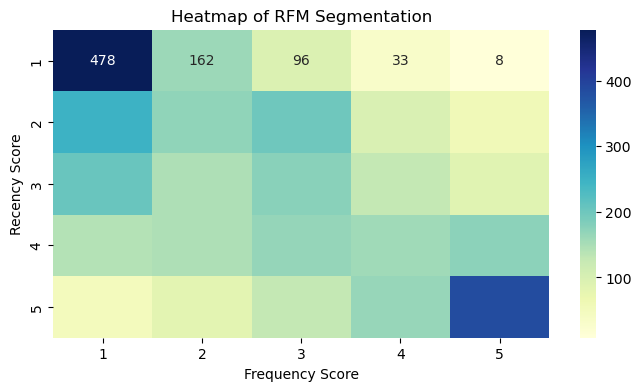

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah pelanggan untuk setiap kombinasi RFM_Score
rfm_heatmap = df_user.groupby(['recency_score', 'frequency_score']).size().unstack()

# Membuat heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(rfm_heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of RFM Segmentation')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()

## Bar Plot

**Menampilkan jumlah pelanggan di setiap segmen, memberikan gambaran tentang distribusi pelanggan di berbagai segmen.**

                  segment  jumlah_pelanggan
0             01-Champion               550
1      02-Loyal Customers               546
2  03-Potential Loyalists               523
3      04-Can't Lose Them                64
4       05-Need Attention               176
5        06-New Customers                50
6            07-Promising               142
7              08-At Risk               426
8       09-About to Sleep               352
9          10-Hibernating              1060


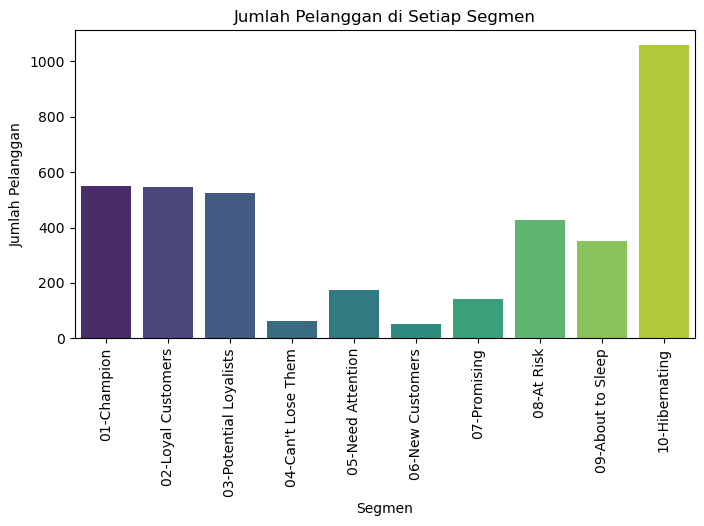

In [71]:
# Menghitung jumlah pelanggan di setiap segmen
jumlah_pelanggan_per_segmen = df_user.groupby('segment')['customer_id'].size().reset_index(name='jumlah_pelanggan')

# Menampilkan hasil
print(jumlah_pelanggan_per_segmen)

plt.figure(figsize=(8, 4))
sns.barplot(x='segment', y='customer_id', data=df_user.groupby('segment')['customer_id'].count().reset_index(), palette='viridis')
plt.xticks(rotation=90)
plt.title('Jumlah Pelanggan di Setiap Segmen')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Scatter Plot

Menunjukkan hubungan antara jumlah pesanan dan total nilai pesanan untuk setiap segmen, membantu dalam mengidentifikasi nilai pelanggan di berbagai segmen.

                  segment  order_cnt  total_order_value
0             01-Champion       8508        2741602.325
1      02-Loyal Customers       4787        1425301.643
2  03-Potential Loyalists       1480         397724.020
3      04-Can't Lose Them        728         181143.890
4       05-Need Attention        598         173005.621
5        06-New Customers         50          12002.220
6            07-Promising        142          40318.780
7              08-At Risk       1762         488910.491
8       09-About to Sleep        499         156270.000
9          10-Hibernating       1392         361442.403


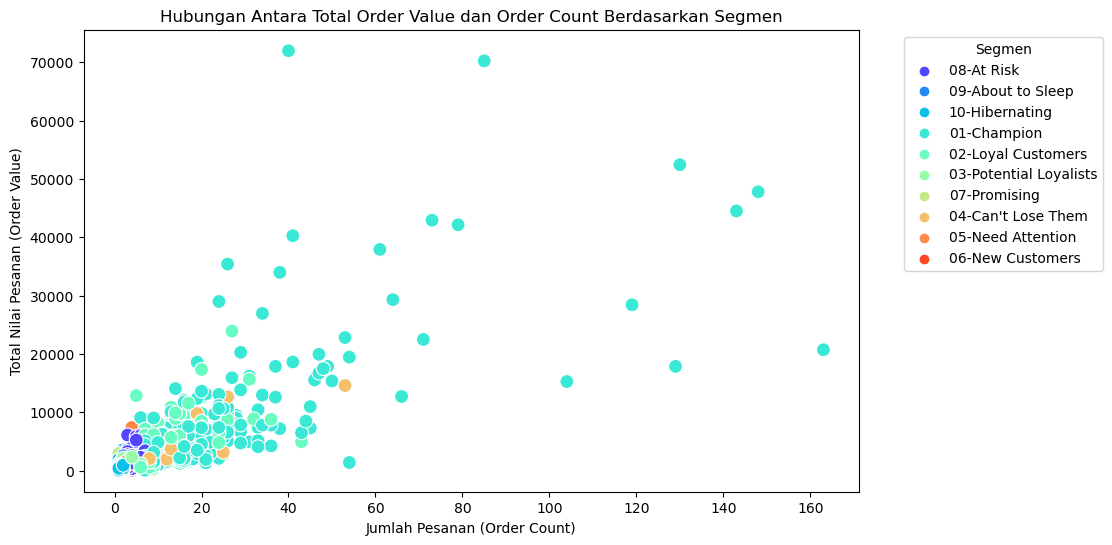

In [69]:
# Menghitung jumlah pesanan dan total nilai pesanan untuk setiap segmen
summary_by_segment = df_user.groupby('segment').agg({
    'order_cnt': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Menampilkan hasil
print(summary_by_segment)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_cnt', y='total_order_value', hue='segment', data=df_user, palette='rainbow', s=100)
plt.title('Hubungan Antara Total Order Value dan Order Count Berdasarkan Segmen')
plt.xlabel('Jumlah Pesanan (Order Count)')
plt.ylabel('Total Nilai Pesanan (Order Value)')
plt.legend(title='Segmen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()